# Build Doucment Term Matrix and Filter Rare Words

In [22]:
library(jsonlite)
library(tm)

Loading required package: NLP


In [23]:
ingredients=fromJSON('./data/words/simplified.json')
ingred=Corpus(VectorSource(ingredients$ingredients))
DTM=DocumentTermMatrix(ingred,control=list(tolower=F))
dim(DTM)

[1] 167508   3949

In [24]:
sparse = removeSparseTerms(DTM, 0.9999)

In [4]:
library(Matrix)

In [5]:
sparseData=as(as.matrix(sparse), "sparseMatrix")
dim(sparseData)

[1] 167508   1852

In [4]:
write.table(colnames(sparse),'./data/keywords.txt',row.names=F,col.names=F)

In [6]:
writeMM(sparseData, './data/document_term_matrix.mtx')

NULL

# LDA Tuning to Determine Best Number of Topics

In [4]:
library(ldatuning)

In [5]:
index=sample.int(dim(sparse)[1], dim(sparse)[1], replace = FALSE, prob = NULL)
shuffled=sparse[index,]

In [6]:
dim(shuffled)

[1] 167508   1852

In [7]:
result <- FindTopicsNumber(
  shuffled,
  topics = round(c(5:14)^2.2),
  metrics = c("Griffiths2004", "CaoJuan2009", "Arun2010", "Deveaud2014"),
  method = "Gibbs",
  control = list(seed = 77),
  mc.cores = 3L,
  verbose = TRUE
)

fit models... done.
calculate metrics:
  Griffiths2004... done.
  CaoJuan2009... done.
  Arun2010... done.
  Deveaud2014... done.


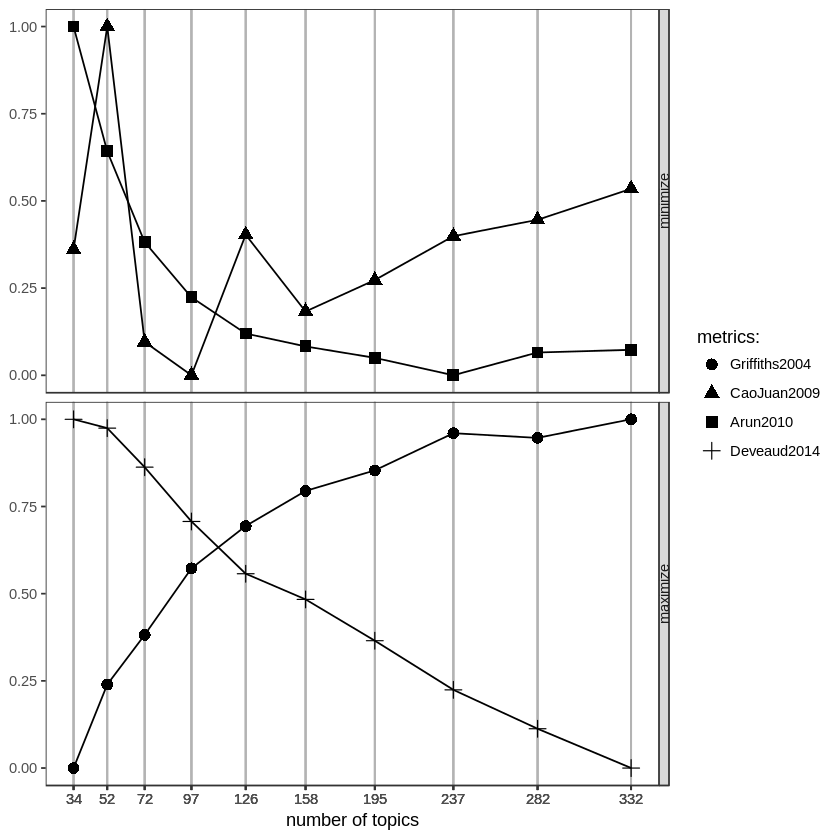

In [8]:
FindTopicsNumber_plot(result)

# Fitting LDA Transformed Data into Dirichlet Distribution 
Determine the Prior for Document-topic Distribution

In [1]:
y=read.csv('./data/LDAtransformed.csv',header=F)

In [2]:
library(VGAM)

Loading required package: stats4
Loading required package: splines


In [ ]:
shape=matrix(0,0,160)

In [14]:
index=sample.int(dim(y)[1], 5000, replace = FALSE, prob = NULL)
sub=as.matrix(y)[index,]
fit = vglm(sub ~ 1, dirichlet, trace = TRUE, crit="c")
shape=rbind(shape,exp(coef(fit, matrix=TRUE)))
shape

,loge(shape1),loge(shape2),loge(shape3),loge(shape4),loge(shape5),loge(shape6),loge(shape7),loge(shape8),loge(shape9),loge(shape10),⋯,loge(shape151),loge(shape152),loge(shape153),loge(shape154),loge(shape155),loge(shape156),loge(shape157),loge(shape158),loge(shape159),loge(shape160)
(Intercept),0.2365166,0.2368364,0.2570545,0.2651252,0.2663623,0.2605673,0.2365771,0.2365698,0.2692210,0.2681192,⋯,0.2366231,0.2890423,0.2368364,0.2702998,0.2365166,0.2777834,0.2369115,0.2365166,0.3071974,0.2366764
(Intercept),0.2365590,0.2369858,0.2562429,0.2648771,0.2668535,0.2618650,0.2366195,0.2366123,0.2687676,0.2714644,⋯,0.2366123,0.2879894,0.2368256,0.2692912,0.2366123,0.2780197,0.2367189,0.2365590,0.3101590,0.2366656
(Intercept),0.2368269,0.2370940,0.2565663,0.2643648,0.2627335,0.2598198,0.2368414,0.2367736,0.2698484,0.2734562,⋯,0.2368269,0.2909552,0.2370405,0.2724904,0.2369554,0.2772834,0.2372228,0.2367202,0.3017668,0.2370940


In [15]:
mean(shape)

[1] 0.2556445

# Fitting Number of Ingredients to Negative Binomial Distribution

In [105]:
recipes=as.list(ingred)
number_of_ingredients=function(document){
    length(strsplit(document,", ")[[1]])-1
    }
counts=unlist(lapply(recipes, number_of_ingredients))

In [110]:
library(MASS)
nb=fitdistr(counts, densfun="negative binomial")

In [111]:
coef(nb)
prob=coef(nb)[1]/(coef(nb)[1]+coef(nb)[2])
prob

size       mu 
14.60742 11.77484

size 
0.5536834

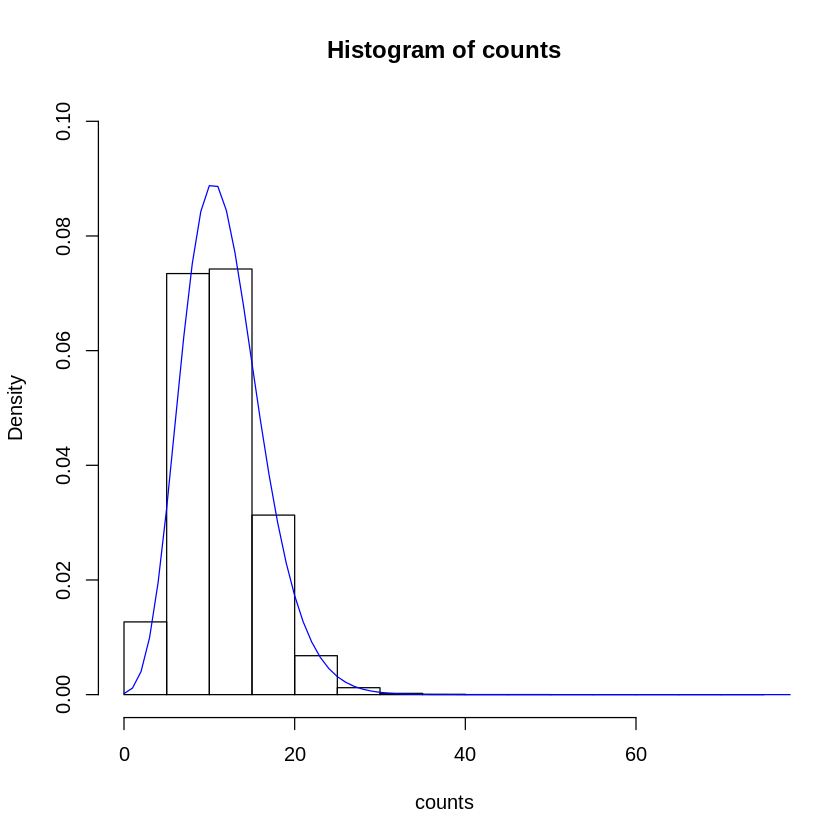

In [113]:
hist(counts, freq = F, ylim=c(0,0.1))
x=c(0:100)
lines(x, dnbinom(x, size=coef(nb)[1], mu=coef(nb)[2], log = FALSE),col='blue')